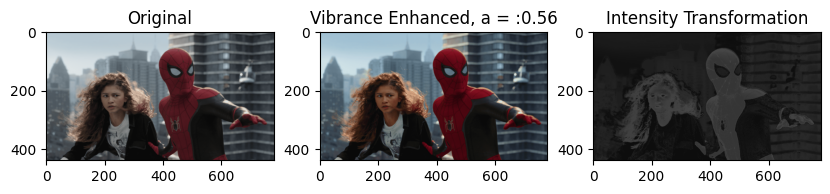

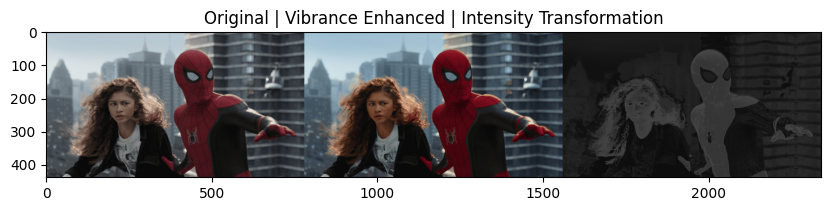

In [6]:
#Question 3 - Vibrancy Enhancement
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as math

#Part (a)
img = cv.imread('images/spider.png')
assert img is not None
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV_FULL)
h, s, v = cv.split(hsv)

#Part (b)
#Function to apply the intensity transform to every pixel in the saturation plane
def in_img(s, a, sigma):
    height, width = s.shape
    result = np.zeros_like(s)

    for y in range(height):
        for x in range(width):
            intensity = s[y, x]
            result[y, x] = min(intensity + a * 128 * math.exp(-((intensity - 128) ** 2) / (2 * sigma ** 2)), 255)
    return result

#Part (c)
a = 0.56
sigma = 70
s_transform = in_img(s, a, sigma)

#Part (d)
hsv_mod = cv.merge((h, s_transform, v))
im2 = cv.cvtColor(hsv_mod, cv.COLOR_HSV2BGR_FULL)
i_trans = cv.absdiff(s, s_transform)
i_trans_final = cv.cvtColor(i_trans, cv.COLOR_GRAY2BGR)
im_final = np.hstack((img, im2, i_trans_final))

fig, ax = plt.subplots(1, 3, figsize = (10,10))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(im2)
ax[1].set_title("Vibrance Enhanced, a = :{:.2f}".format(a))
ax[2].imshow(i_trans_final)
ax[2].set_title('Intensity Transformation')
plt.show()

fig2, ax2 = plt.subplots(1, 1, figsize=(10, 10))
ax2.imshow(im_final)
ax2.set_title('Original | Vibrance Enhanced | Intensity Transformation')
plt.show()
